<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/PCA_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos, exploración y preprocesamiento de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1- Cargar el dataset

dataset_path = '/content/winequality-red.csv'
dataset = pd.read_csv(dataset_path)

# 2- Identificación y eliminación de valores duplicados

def remove_duplicates(df, dataset_name):
    print(f"{dataset_name}: Duplicados antes de la limpieza: {df.duplicated().sum()}")
    df_cleaned = df.drop_duplicates()
    print(f"{dataset_name}: Duplicados después de la limpieza: {df_cleaned.duplicated().sum()}")
    return df_cleaned

# 3- Limpiar duplicados en el dataset

cleaned_data = remove_duplicates(dataset, "Wine Quality Data")

# 4- Ajuste de tipos de datos

def adjust_data_types(df, dataset_name):
    print(f"\nVerificando y ajustando tipos de datos para {dataset_name}:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"  Columna '{col}': Tipo 'object', manteniéndola como categórica.")
            df[col] = df[col].astype('category')
        elif df[col].dtype in ['float64', 'int64']:
            if df[col].dtype == 'float64' and df[col].apply(float.is_integer).all():
                print(f"  Columna '{col}': Convertida de 'float64' a 'int64'.")
                df[col] = df[col].astype('int64')
    return df

# 5- Ajustar tipos de datos

adjusted_data = adjust_data_types(cleaned_data, "Wine Quality Data")

# 6- Manejo de valores faltantes

def handle_missing_values_corrected(df, dataset_name):
    print(f"\nManejando valores faltantes para {dataset_name}:")

    # Identificar columnas numéricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    print(f"  Columnas numéricas: {numeric_cols.tolist()}")

    # Imputación para columnas numéricas (mediana)
    num_imputer = SimpleImputer(strategy='median')
    df.loc[:, numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    print(f"  Valores faltantes después de la imputación: {df.isnull().sum().sum()}")
    return df

# Aplicar el manejo de valores faltantes corregido
final_data_corrected = handle_missing_values_corrected(adjusted_data, "Wine Quality Data")

# Verificar el resultado final
print(final_data_corrected.head())


# 6- Escalado de los datos numéricos
def scale_data(df, dataset_name):
    print(f"\nEscalando datos para {dataset_name}:")

    # Identificar columnas numéricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Aplicar escalado con StandardScaler
    scaler = StandardScaler()
    df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print(f"Datos escalados para {dataset_name}.")
    return df

# Escalar el dataset
scaled_data = scale_data(final_data_corrected, "Wine Quality Data")

# Mostrar un resumen de los datos escalados
scaled_data.describe()


Wine Quality Data: Duplicados antes de la limpieza: 240
Wine Quality Data: Duplicados después de la limpieza: 0

Verificando y ajustando tipos de datos para Wine Quality Data:

Manejando valores faltantes para Wine Quality Data:
  Columnas numéricas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
  Valores faltantes después de la imputación: 0
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  den

<ipython-input-4-ce0d9305b059>:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.7570404  -0.7570404  -0.7570404  ...  0.45762065 -0.7570404
  0.45762065]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03
mean,-6.274108e-16,1.463959e-16,2.091369e-17,-1.202537e-16,1.882232e-16,-8.365477e-17,4.182739e-17,5.286982e-14,-1.202537e-15,-5.542129e-16,1.254822e-16,5.332992e-16
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-2.137008e+00,-2.238023e+00,-1.393258e+00,-1.200903e+00,-1.542254e+00,-1.426094e+00,-1.222457e+00,-3.553604e+00,-3.676535e+00,-1.926712e+00,-1.878873e+00,-3.186363e+00
25%,-6.972071e-01,-7.623226e-01,-9.328165e-01,-4.611571e-01,-3.671819e-01,-8.515696e-01,-7.433672e-01,-5.935822e-01,-6.438707e-01,-6.371766e-01,-8.619244e-01,-7.570404e-01
50%,-2.364707e-01,-5.180013e-02,-6.309377e-02,-2.392334e-01,-1.848432e-01,-1.812915e-01,-2.642772e-01,-4.789431e-03,1.376908e-03,-2.268699e-01,-2.147753e-01,4.576206e-01
75%,5.122260e-01,6.040667e-01,8.066290e-01,5.666484e-02,5.827504e-02,4.889867e-01,4.843008e-01,5.947087e-01,5.820998e-01,4.178978e-01,6.172735e-01,4.576206e-01
max,4.370894e+00,5.741690e+00,3.722758e+00,9.599383e+00,1.059340e+01,5.372442e+00,7.251446e+00,3.736721e+00,4.518110e+00,7.862034e+00,4.130369e+00,2.886943e+00


# Aplicacion del PCA

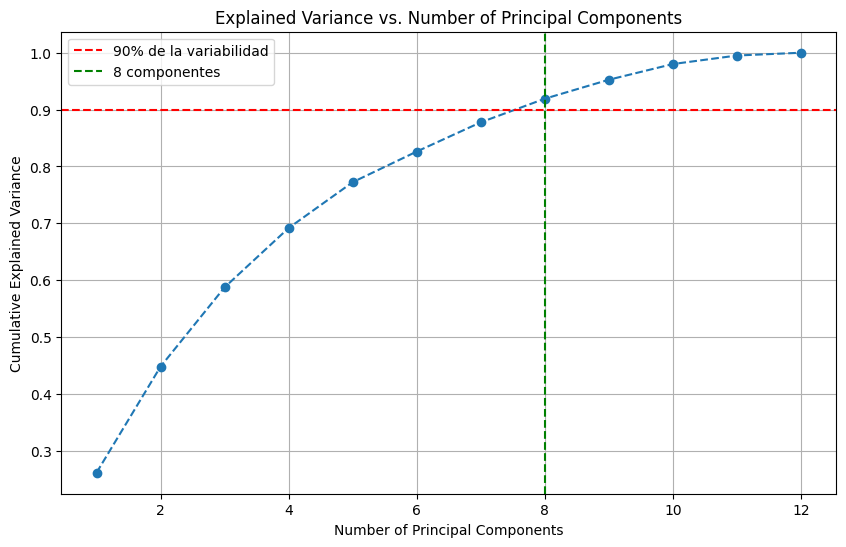

Se necesitan 8 componentes principales para capturar al menos el 90% de la variabilidad.
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.766603 -1.186903 -1.351484 -0.053316  0.139228  1.000359 -0.142542   
1 -0.949340 -2.046605  0.059588  0.432896  0.254933 -0.253027  1.436909   
2 -0.884805 -1.391584 -0.663754  0.311548  0.123005 -0.053433  0.720138   
3  2.405609  0.205338  0.064907 -0.869784 -1.524963  0.037512 -0.214821   
4 -1.725338 -1.211033 -1.100199 -0.050252 -0.050171  1.042927 -0.221928   

        PC8  
0 -0.035446  
1  0.292970  
2  0.176824  
3  0.149329  
4 -0.045055  
Varianza explicada por los 8 componentes principales: 0.92


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 3. Determinar el PCA óptimo
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número de componentes necesarios para capturar al menos el 90% de la variabilidad
components_needed = np.argmax(explained_variance_ratio >= 0.90) + 1

# Visualización de la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de la variabilidad')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'{components_needed} componentes')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Se necesitan {components_needed} componentes principales para capturar al menos el 90% de la variabilidad.")

# 4. Aplicar PCA con el número óptimo de componentes principales
optimal_pca = PCA(n_components=components_needed)
reduced_data = optimal_pca.fit_transform(scaled_data)

# Convertir a DataFrame para facilitar la manipulación y análisis
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(components_needed)])

# Mostrar las primeras filas del dataset reducido
print(reduced_df.head())

# Confirmar la varianza explicada por los componentes seleccionados
explained_variance = np.sum(optimal_pca.explained_variance_ratio_)
print(f"Varianza explicada por los {components_needed} componentes principales: {explained_variance:.2f}")


# Analisis de cada componente

In [ ]:

# 1. Extraer los coeficientes (cargas) de los componentes principales
pca_components = pd.DataFrame(
    optimal_pca.components_,
    columns=scaled_data.columns,
    index=[f'PC{i+1}' for i in range(optimal_pca.n_components_)]
)

# 2. Mostrar las cargas de los componentes principales
print("Cargas de los componentes principales (contribución de cada variable):")
print(pca_components)

# 3. Identificar las variables más influyentes en cada componente principal
print("\nVariables más influyentes en cada componente principal:")
for i in range(optimal_pca.n_components_):
    sorted_coefficients = pca_components.iloc[i].sort_values(ascending=False)
    print(f"\nComponente Principal {i+1}:")
    print(sorted_coefficients.head(3))  # Mostrar las 3 variables más influyentes



Cargas de los componentes principales (contribución de cada variable):
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.484209         -0.264616     0.472147        0.129157   0.200631   
PC2       0.005753         -0.341580     0.143292       -0.136939  -0.178459   
PC3      -0.167297         -0.222340     0.099226        0.234943  -0.036942   
PC4      -0.238146          0.035549    -0.051884       -0.409398   0.643358   
PC5      -0.084526          0.310151    -0.099255        0.722128   0.297978   
PC6       0.024233         -0.115356    -0.205145       -0.146037  -0.349378   
PC7       0.327924          0.690112    -0.178201       -0.262002  -0.137082   
PC8      -0.195980         -0.091506    -0.305033        0.172963   0.185856   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1            -0.032235              0.017844  0.368159 -0.438951   0.261480   
PC2            -0.250987             -0.358935

# Visualizacion y comparacion

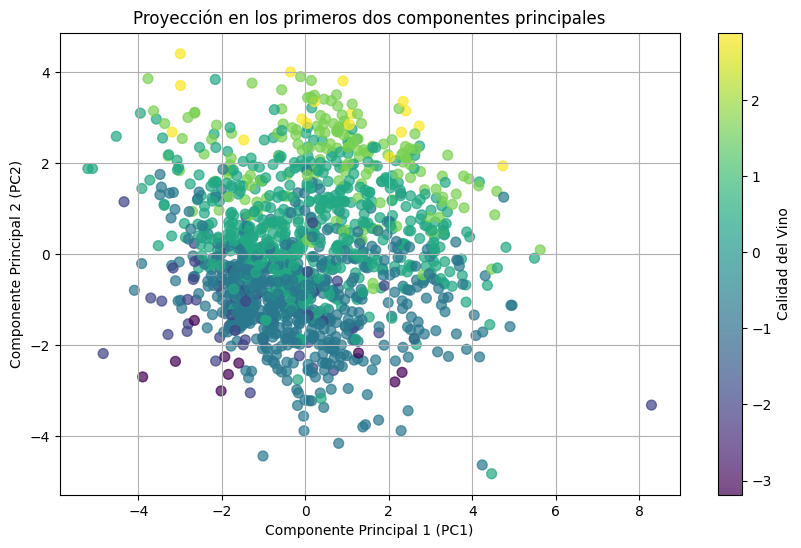

In [ ]:
# Visualizar los datos proyectados en los primeros dos componentes principales
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de PC1 y PC2, coloreado por la calidad del vino
scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=final_data_corrected['quality'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Calidad del Vino')
plt.title('Proyección en los primeros dos componentes principales')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()
